In [ ]:
%cd /content/drive/MyDrive/_main_/1_FL/asl_poses/points

/content/drive/MyDrive/_main_/1_FL/asl_poses/points


In [ ]:
!pip install mediapipe
!pip install polars

In [ ]:
import sys
import os
import os.path as osp
from glob import glob
from pathlib import Path

import cv2
import math
import numpy as np
import pandas as pd
import polars as pl
from PIL import Image
import mediapipe as mp
import matplotlib.pyplot as plt
from math import atan2, degrees

import yaml
from utils_asl import *
from google.colab.patches import cv2_imshow

In [ ]:
# mp_drawing = mp.solutions.drawing_utils
# mp_drawing_styles = mp.solutions.drawing_styles
mpPose = mp.solutions.pose

pose = mpPose.Pose(static_image_mode=True,
                    model_complexity=2,
                    enable_segmentation=True,
                    min_detection_confidence=0.5) ### create a new MediaPipe Pose instance

bd = glob("data/*BD*")
bt = glob("data/*BT*")
bn = glob("data/*BN*")
frases = [bd, bt, bn]
www  = len(bd), len(bt), len(bn)
print(www, sum(www))

dp = ['RIGHT_ELBOW', 'LEFT_ELBOW', 'RIGHT_HIP', 'LEFT_HIP', 'RIGHT_SHOULDER', 'LEFT_SHOULDER', 'RIGHT_WRIST', 'LEFT_WRIST']

(29, 28, 29) 86


In [ ]:
zz = [i.split("/")[-1].split("_")[0] for i in bd]
zz

['isaac',
 'ariel',
 'angelo',
 'paul',
 'jpw',
 'jpr',
 'jprr',
 'jpb',
 'jpbb',
 'anth',
 'mav',
 'ces',
 'clara',
 'rd1',
 'val',
 'alex',
 'karen',
 'ivan',
 'deya',
 'ian',
 'luis',
 'yairy',
 'nayeska',
 'brit',
 'norma',
 'alexa',
 'bato',
 'matc',
 'samira']

In [ ]:
# for i in bn:
#     vid = i.split("/")[-1]
#     f, s = vid.split("_")[0], vid.split("_")[-1].split(".")[0]
#     if f.islower()==False:
#         new = f'data/{s}_{f}.mp4'
#         os.rename(i, new)
#         print(s, f)

In [ ]:
### initialize instance
mp_drawing = mp.solutions.drawing_utils
mp_drawing_styles = mp.solutions.drawing_styles
mp_pose = mp.solutions.pose

pose = mp_pose.Pose(static_image_mode=True,
                  model_complexity=2,
                  enable_segmentation=True,
                  min_detection_confidence=0.5)

In [ ]:
bd

(120, 224, 467, 3)


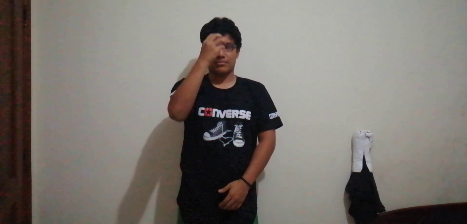

In [ ]:
vidd = 3
tensor = video2tensor(bd[vidd])
print(tensor.shape)
kl = cv2.cvtColor(tensor[15], cv2.COLOR_BGR2RGB)
Image.fromarray(kl)

(120, 224, 467, 3)


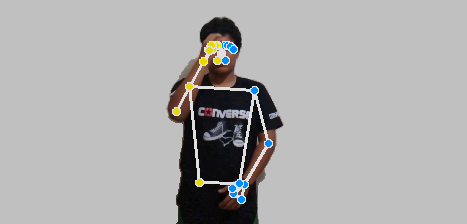

In [ ]:
image = kl.copy()

image_height, image_width, _ = image.shape
# Convert the BGR image to RGB before processing
results = pose.process(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

# BG_COLOR = (0, 0, 0) # black
# BG_COLOR = (255, 255, 255) # black
# BG_COLOR = (125, 125, 125) # dark gray
BG_COLOR = (192, 192, 192) # gray

annotated_image = image.copy()

condition = np.stack((results.segmentation_mask,) * 3, axis=-1) > 0.1
bg_image = np.zeros(image.shape, dtype=np.uint8)
bg_image[:] = BG_COLOR
annotated_image = np.where(condition, annotated_image, bg_image)

# Draw pose landmarks on the image.
mp_drawing.draw_landmarks(
    image=annotated_image,
    landmark_list=results.pose_landmarks,
    connections=mp_pose.POSE_CONNECTIONS,
    landmark_drawing_spec=mp_drawing_styles.get_default_pose_landmarks_style())
# cv2.imwrite('/tmp/annotated_image' + str(idx) + '.png', annotated_image)

# Plot pose world landmarks
# mp_drawing.plot_landmarks(
#     results.pose_world_landmarks, mp_pose.POSE_CONNECTIONS)

Image.fromarray(annotated_image)

In [ ]:
glob("*.mp4")

['noma_bn.mp4', 'bato_BD.mp4']

In [ ]:
# (2.3-1.3)==1
# round(2.3, 2)-round(1.3, 2)